너희 안에 이 마음을 품으라 곧 그리스도 예수의 마음이니 그는 근본 하나님의 본체시나 하나님과 동등됨을 취할 것으로 여기지 아니하시고 오히려 자기를 비워 종의 형체를 가지사 사람들과 같이 되셨고 사람의 모양으로 나타나사 자기를 낮추시고 죽기까지 복종하셨으니 곧 십자가에 죽으심이라 (빌2:5-8)
<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MLwithPython.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

# 제 7-2 강: 순방향 신경망 실습$^{feed-forward \ neural \ network \ practice}$

## 학습 목표
- 예제를 통해 순방향 신경망을 깊이 있게 이해한다

## 학습 내용
- MNIST 자료 이해 하기
- 다층 신경망 설계 하기
- 순방향 신경망  신호처리
- 순방향 신경망 예제 구현 하기 

In [ ]:
import numpy as np
import imp
import joy
imp.reload(joy)

## 1. 다층 신경망의 신호처리

이전 강의에서 여러분들은 다층 신경망에서 신호가 어떻게 처리되는지 직접 계산은 해보았습니다.
하지만, 아직 실감이 가지 않을 수도 있습니다. 꿈의 함수 제조기가 겨우 행렬의 곱셈과 덧셈 몇 번만으로 끝나는 것인지 의심스러울 수도 있습니다. 왜냐하면 여러분들이 이전 강의에서 다룬 내용은 신경망에서 신호가 어떻게 처리 되는지를 확인 하기 위한 예제에서 그쳤기 때문입니다.

우리는 이번 강의에서 인공 신경망이 정말 유의미한 값을 우리에게 알려주는지 정말 꿈의 함수 제조기가 맞는지 확인해 보도록 하겠습니다.

아래는 오늘 우리가 실습해 볼 입력 자료 입니다.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch7/MNIST50419.png?raw=true" width="600">
<center>그림 1: MNIST 데이터셋의 첫 5장의 이미지</center>

MNIST 라는 데이터셋의 첫 5장의 이미지입니다. MNIST 데이터 셋에 대한 자세한 설명은 뒤 강의에서 설명할테니 잠시 미루도록 하겠습니다.
해당 이미지는 28x28의 크기를 가지고 있는 숫자 이미지 입니다. <br>저희가 보는 것과 같이 5, 0, 4, 1, 9가 적힌 이미지이며 우리는 오늘 이 숫자들을 한번 인식해보도록 하겠습니다.<br> 
바로 이전 강의에서 배웠던 행렬의 곱셈과 덧셈만으로 말이죠!

벌써 두근거리지 않나요? 자, 하나씩 살펴보도록 하겠습니다.

아래는 순방향 신경망을 계산해보기 위해 우리가 만들었던 3개의 층에 각각 2개, 3개, 2개의 뉴런이 구성된 신경망입니다.<br>
$x_1$ 과 $x_2$는 인공 신경망의 입력 값이었고,<br>
$W$는 두 층 사이의 가중치 행렬,<br>
$Z$는 뉴론의 입력과 가중치를 곱한 결과의 합,<br>
$A$는 뉴론의 출력으로 나타내는 것을 지난 시간에 약속하였습니다.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch7/2-3-2NN-Weights.PNG?raw=true" width="600">
<center>그림 2: 신경망의 입력과 출력 및 가중치 $W_{ij}$</center>

그렇다면, 숫자를 인식하기 위해 이번 실습에서도 입력은 $x1$과 $x2$만 있으면 될까요? 그렇지 않습니다. 왜냐하면, 우리가 인식할 숫자 이미지는 28x28의 크기를 가지고 있는 이미지입니다.<br>
28x28 크기의 숫자 이미지를 인식하기 위해서는 784($28*28$)개의 입력이 필요합니다.
즉, $X$는 $x_1, x_2, x_3, ..., x_{784}$가 되어야 합니다. 왜냐하면, 28x28의 이미지 각각의 화소(piexel)들이 하나의 뉴론으로 신경망에 주어지기 때문입니다.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch7/28x28mnist.PNG?raw=true" width=300>

조금 감이 잡히나요?

그렇다면 은닉층을 구성하는 뉴론은 몇개가 좋을까요? 정답은 없습니다. 개발자들이 정해주기 나름입니다. 물론 입력 뉴론이 많아지면 은닉층의 뉴론도 같이 늘려줘야 학습이 제대로 이루어 집니다. 이번 실습에서는 은닉층의 뉴론을 100개로 설정하도록 하겠습니다.

벌써 2개의 층을 구성하였습니다. 마지막으로 출력층의 뉴론은 몇개로 구성을 해야 할까요?<br>
우리는 숫자를 인식하는 인공신경망을 만들고자 합니다. 따라서 0 ~ 9 사이의 숫자 총 10가지를 인식할 것입니다. 우리가 만든 신경망이 0 ~ 9 까지의 숫자를 인식할 수 있다면, 3 자리 수, 4 자리 수, 그 이상의 수도 쉽게 인식 할 수 있겠죠?

이제, 우리가 만든 신경망을 도식화하여 확인해보도록 하겠습니다.

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch7/784-100-10NN.png?raw=true" width="600">
<center>그림 3: 숫자 인식 인공 신경망</center>

그림 2의 신경망에 비해 크게 달라진 점은 각 층의 뉴론의 개수가 많아진 것과 출력이 2개에서 10개로 늘어난 것 외에는 없나요? 한 가지 빠진게 있죠? 바로 인공 신경망의 핵심이라고 할 수 있는 가중치도 입력 뉴론과 은닉 뉴론이 많아짐에 따라 같이 증가하였습니다. 

과연 인공 신경망의 가중치는 몇개나 많아졌을까요?

입력 뉴론이 784개이고, 첫 번째 은닉층의 뉴론이 100개입니다. 각각의 입력 뉴론이 은닉층의 뉴론들과 연결되어 있으므로 총 784 x 100 개의 서로 다른 가중치를 가지게 됩니다. 놀라울 정도로 많지 않습니까?<br>
출력 층은 0~9까지의 숫자를 인식하기 때문에 10개의 출력 뉴론이 될 것이기에 첫 번째 은닉층의 뉴론 100개와 출력 층 뉴론의 개수 10개의 조합인 100 x 10 개의 가중치를 가지게 될 것입니다.
뉴론의 개수가 많아졌다고 해서 겁 먹을 필요는 전혀 없습니다. 우리는 이 많은 가중치 합을 직접 계산 하는 것이 아니라 컴퓨터가 대신 해줄 것을 알기 때문이죠. 

지금까지 우리는 숫자를 인식하는 인공 신경망을 만들기 위해 각 층의 뉴론들이 어떻게 구성되어야 하는지 살펴보았습니다. 우리가 생각한 인공 신경망이 제대로 동작하는지 코드로 확인해보도록 할까요?

## 2 숫자 인식 인공 신경망 구현
### 2.1 입력 자료 준비

입력 자료는 MNIST 데이터 셋에 있는 숫자 이미지를 사용할 것입니다.

신경망의 입력 특성 행렬$^{feature \ matrix}, \mathbf{X}^{n\times m}$은 1개의 샘플$(m=1)$과 784개의 특성$(n=784)$를 가지고 있으므로 다음과 같이 표기할 수 있습니다.

\begin{align}
  \mathbf{X} \in  \mathbb{R}^{nxm} 
\end{align}

\begin{align}
\mathbf{X} = 
\begin{pmatrix}
   x^{(0)}_1\\
   x^{(0)}_2\\
   \vdots\\
   x^{(0)}_{783}\\
   x^{(0)}_{784}
\end{pmatrix} 
\end{align}



### 2.2 가중치 불러오기
지난 강의에서는 가중치를 임의의 값으로 초기화 하였습니다. 하지만, 오늘 강의에서는 미리 학습된 인공 신경망의 가중치 값을 불러와서 사용할 것입니다. 이 가중치 값은 우리가 만들어가고 있는 다층 인공 신경망의 구조와 동일한 구조로 만들어진 인공 신경망을 학습시켜서 얻은 값입니다. 약 96%의 성능을 보이는 인공 신경망의 가중치 값입니다.

우리가 코드로 직접 확인해볼 가중치는 784 x 100로 첫번째 은닉층의 가중치를 열어서 확인해 보겠습니다.
우리가 배운 표기법으로 나타내면 첫번째 은닉층의 가중치는 다음과 같습니다.

\begin{align}
  W^{[2]}\ &= 
  \begin{pmatrix}
   w^{(1)}_1 & w^{(2)}_1  & \cdots & W^{(99)}_1 & w^{(100)}_1\\
   w^{(1)}_2 & w^{(2)}_2  & \cdots & W^{(99)}_2 & w^{(100)}_2\\
   \vdots & \vdots & \vdots & \vdots & \vdots \\
   w^{(1)}_{100} & w^{(2)}_{100}  & \cdots & w^{(99)}_{100} & w^{(100)}_{100}
\end{pmatrix} 
\end{align}  


In [ ]:
#!type data/w_xh.txt

In [ ]:
#!type data/w_xh.txt

In [ ]:
#!cat data/w_xh.txt

### 2.2.1 은닉층 계산

이제 첫번째 은닉층의 가중치도 확인해 봤으니 입력 값과 가중치를 코드로 변환하고, 행렬의 곱과 합으로 첫번째 층의 출력을 계산해보겠습니다.


먼저, 지난 강의에서 배웠던 입력 뉴론이 2개, 은닉 뉴론이 3개 출력 뉴론이 2개였던 인공 신경망의 가중치 합$^{weighted \ sum}$은 일반 식(1)을 적용하여 다음과 같이 신경망의 결과를 만들었습니다.

\begin{align}
  \mathbf{Z}^{[l]} &= W^{[l]} A^{[l-1]}    \tag{1} \\ \\
  \mathbf{Z}^{[1]} &= W^{[1]} A^{[0]}   \\
                   &= 
  \begin{pmatrix}
    w^{(1)}_{11} & w^{(1)}_{21} \\  
    w^{(1)}_{12} & w^{(1)}_{22} \\
    w^{(1)}_{13} & w^{(1)}_{23}
  \end{pmatrix}
  \begin{pmatrix} x_1  \\ x_2  \\ \end{pmatrix} \\ &=
  \begin{pmatrix} z^{(1)}_1  \\ z^{(1)}_2  \\ z^{(1)}_3 \end{pmatrix} \\
\end{align}

숫자를 인식하는 인공 신경망에서는 각 층 뉴론의 개수만 늘어났기 때문에 식(1)에서 나타나는 열의 숫자는 1 ~ 784으로 행의 숫자는 1 ~ 100 으로 확장 된 식을 생각하시면 됩니다.


계산 식은 위에서 말한 식(1)을 따르도록 하겠습니다.

\begin{align}
\mathbf{W}^{[1]} \mathbf{X}^{[0]} = 
\begin{pmatrix}
w^{(1)}_1 & w^{(2)}_1  & \cdots & w^{(783)}_1 & w^{(784)}_1\\
w^{(1)}_2 & w^{(2)}_2  & \cdots & w^{(783}_2 & w^{(784)}_2\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
w^{(1)}_{100} & w^{(2)}_{100}  & \cdots & w^{(783)}_{100} & w^{(784)}_{100}
\end{pmatrix} 
\begin{pmatrix}
   x^{(0)}_1\\
   x^{(0)}_2\\
   \vdots\\
   x^{(0)}_{783}\\
   x^{(0)}_{784}
\end{pmatrix}\\ 
\end{align}

\begin{align}
\mathbf{A}^{[l]} &=\mathbf{g}(\mathbf{Z}^{[l]})\\
\mathbf{A}^{[1]} &=sigmoid(\mathbf{Z}^{[1]})
\end{align}


먼저, MNIST 숫자 데이터를 불러오기 위해 joy 모듈을 import 해줍니다. joy 모듈에 대해서는 뒤 강의에서 자세히 설명하도록 하겠습니다. 우선은 신경망이 정말로 제대로 동작하는지 부터 한번 확인해봅시다!

In [1]:
import joy
import numpy as np
g = lambda x : 1 / (1 + np.exp(-x))

In [14]:
(X, y) = joy.load_mnist_num(9)
W1 = joy.load_mnist_weight('data/w_xh.weights')
Z1 = np.dot(W1, X)
A1 = g(Z1)

print('image', y)
print('X.shape:', X.shape)
print('W1.shape:', W1.shape)
print('Z1.shape:', Z1.shape)
print('A1.shape:', A1.shape)

image 9
X.shape: (784,)
W1.shape: (100, 784)
Z1.shape: (100,)
A1.shape: (100,)


$X$는 joy.load_num(5)로 불러들인 5라는 숫자가 적힌 이미지이고 $y$는 불러들인 이미지의 레이블 입니다.<br>
$W1$은 미리 학습된 가중치 이며 100 X 784의 형상을 가지고 있습니다.<br>
$Z1$은 첫번째 은닉층의 결과이며 이를 활성화 함수$^{sigmoid}$ $g(\cdot)$를 통해 출력 값 $A1$을 만들어 냅니다.

여러분들은 이번 실습이 끝나고 joy.load_num() 함수를 통해 다른 숫자들도 불러와 인공 신경망을 확인해 볼 수 있습니다.

### 2.2.2 출력층 계산
이제 마지막으로 출력층을 계산하는 코드를 작성해 보겠습니다. 앞에서 배운 것과 같이 은닉층의 출력 $A^{[1]}$과 가중치 $W^{[2]}$ 행렬을 곱하고 합산하여 은닉층의 결과를 구한 다음, 활성화 함수를 적용해 최종 출력 $A^{[2]}$를 구할 수 있습니다. 이렇게 구한 결과 값이 신경망이 예측한 값 $\hat{y}$ 입니다.

\begin{align}
  \mathbf{Z}^{[l]} &= W^{[l]} A^{[l-1]}   \tag{2}\\ \\
  \mathbf{Z}^{[2]} &= W^{[2]} A^{[1]}   \\ 
\end{align}

\begin{align}
  W^{[2]}A^{[1]}\ &= 
  \begin{pmatrix}
   w^{(1)}_1 & w^{(2)}_1  & \cdots & w^{(99)}_1 & w^{(100)}_1\\
   w^{(1)}_2 & w^{(2)}_2  & \cdots & w^{(99)}_2 & w^{(100)}_2\\
   \vdots & \vdots & \vdots & \vdots \\
   w^{(1)}_{10} & w^{(2)}_{10}  & \cdots & w^{(99)}_{10} & w^{(100)}_{10}
   \end{pmatrix} 
   \begin{pmatrix}
   a^{(1)}_1\\
   a^{(1)}_2\\
   \vdots \\
   a^{(1)}_{99}\\
   a^{(1)}_{100}
   \end{pmatrix} 
\end{align}  

\begin{align}
\mathbf{A}^{[l]} &=\mathbf{g}(\mathbf{Z}^{[l]})\\
\mathbf{A}^{[2]} &=sigmoid(\mathbf{Z}^{[2]})
\end{align}

In [15]:
W2 = joy.load_mnist_weight('data/w_hy.weights')
Z2 = np.dot(W2, A1)
yhat = g(Z2)
print('A1.shape:', A1.shape)
print('W2.shape:', W2.shape)
print('Z2.shape:', Z2.shape)

A1.shape: (100,)
W2.shape: (10, 100)
Z2.shape: (10,)


이미지에 적힌 숫자와 인공 신경망이 예측한 값이 서로 맞는지 확인해 볼까요?

In [16]:
print('image:', y)
print('predict:', np.round_(yhat, 3))

image: 9
predict: [0.005 0.002 0.002 0.006 0.006 0.006 0.    0.004 0.008 0.995]


예상했던 결과 값인가요? 이번 결과 값은 약간의 해석이 필요할 것 같습니다.

인공 신경망이 예측한 값은 정확히 우리가 눈으로 보는 것처럼 "5" 이런 식으로 정답을 알려주는 것이 아닙니다.<br>
우리가 인공 신경망의 구조를 만들때를 한번 다시 생각해 볼까요?<br>
출력 뉴론의 개수를 총 10개로 지정하였던 것을 기억하시나요? 그 이유는 우리가 인식하고자 하는 숫자는 0 ~ 9 까지 총 10가지이기 때문입니다.

이 처럼 인공 신경망이 생각하기에 입력과 가장 비슷한 숫자를 찾아 확률로 결과를 나타냅니다.
$\hat{y}$은 총 10개의 행렬로 정답을 알려주는데, 컴퓨터 프로그래밍에서 행렬은 0부터 시작하기 때문에 각각의 색인$^{index}$ 은 0 ~ 9까지의 숫자일 확률을 의미 합니다. 예를 들어, 행렬의 0번째 원소 값은 숫자 0일 확률을 나타내는 것이지요.

그렇다면 0부터 하나씩 행렬의 색인$^{index}$을 세어보면 4번째 원소의 값이 0.997로 가장 높은 값을 보여주고 있음을 알 수 있습니다. 다시 말해, 인공 신경망도 우리가 보여준 숫자가 5라고 말하고 있는 것이지요.

그렇다면 5 말고 다른 숫자 1도 인식하는지 한번 확인해 볼까요?

In [17]:
(X, y) = joy.load_mnist_num(1)
W1 = joy.load_mnist_weight('data/w_xh.weights')
Z1 = np.dot(W1, X)
A1 = g(Z1)

W2 = joy.load_mnist_weight('data/w_hy.weights')
Z2 = np.dot(W2, A1)
yhat = g(Z2)

print('image:', y)
print('predict:', np.round_(yhat, 3))

for i, iyhat in enumerate(yhat):
    print('[{}] = {}'.format(i, np.round(yhat[i], 3)))

idx = np.argmax(yhat)
print('image={}, predicted={}'.format(idx, np.round(yhat[idx], 3)))

image: 1
predict: [0.001 0.976 0.009 0.001 0.021 0.017 0.001 0.004 0.005 0.001]
[0] = 0.001
[1] = 0.976
[2] = 0.009
[3] = 0.001
[4] = 0.021
[5] = 0.017
[6] = 0.001
[7] = 0.004
[8] = 0.005
[9] = 0.001
image=1, predicted=0.976


놀라울 정도로 1번째 색인$^{index}$값이 0.979로 높음을 확인 할 수 있습니다!

우리가 지금까지 한 것은 여러분들이 나중에 기계학습을 활용할 때 직접 가중치를 학습하여서 사용할 수도 있지만, 때로는 다른 사람이 학습한 가중치를 불러와 사용할 때도 있습니다.<br>
여러분들이 이번 강의에서 했던 것 처럼 말이죠!

우리는 이제 순방향 신경망이 정말 잘 동작하고 있는 것을 숫자 인식을 통해 확인하였습니다.<br>
이제 다음 강의부터는 제공된 가중치를 사용하는 것이 아니라 직접 가중치를 학습하는 알고리즘을 배워보도록 하겠습니다.

--------------------

## 학습 정리
- 예제를 통해 순방향 신경망을 깊이 있게 이해하기
- 자료의 특성 이해하기
- 순방향 신경망 설계
- 가중치 불러오기

--------------------

-------
_Rejoice always, pray continually, give thanks in all circumstances; for this is God’s will for you in Christ Jesus. (1 Thes 5:16-18)_

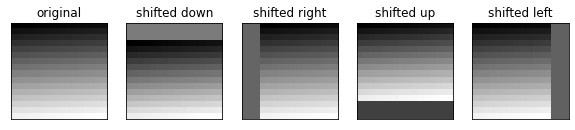

In [12]:
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
import numpy as np
image=np.arange(256).reshape(16,16)

shifted_down=shift(image, [3,0],cval=100)
shifted_right=shift(image,[0,3],cval=100)
shifted_up=shift(image,[-3,0],cval=100)
shifted_left=shift(image,[0,-3],cval=100)

fig, ax=plt.subplots(1,5,figsize=(10,10))
ax[0].imshow(image,cmap='gray')
ax[1].imshow(shifted_down,cmap='gray')
ax[2].imshow(shifted_right,cmap='gray')
ax[3].imshow(shifted_up,cmap='gray')
ax[4].imshow(shifted_left,cmap='gray')
ax[0].set_title("original")
ax[1].set_title("shifted down")
ax[2].set_title("shifted right")
ax[3].set_title("shifted up")
ax[4].set_title("shifted left")

plt.setp(plt.gcf().get_axes(),xticks=[],yticks=[]);
plt.show()